In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
#データインポート
df_prj = pd.read_csv("../1_data/ks-projects-201801.csv")
display(df_prj.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
df_prj.shape

(378661, 15)

In [4]:
#統計量算出
df_prj.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
#欠損値確認
df_prj.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [6]:
#usd pledgedをゼロ埋め
df_prj['usd pledged'] = df_prj['usd pledged'].fillna(0)
df_prj.isnull().sum()

ID                  0
name                4
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [7]:
df_prj.shape

(378661, 15)

In [8]:
#stateを数値化
df_prj['state'] = df_prj['state'].map({'failed': 0, 'successful': 1})
df_prj.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0.0,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0.0,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0.0,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0.0,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,NaN,14,US,1283.0,1283.0,19500.00


In [9]:
df_prj.shape

(378661, 15)

In [10]:
#欠損値確認
df_prj.isnull().sum()

ID                      0
name                    4
category                0
main_category           0
currency                0
deadline                0
goal                    0
launched                0
pledged                 0
state               46986
backers                 0
country                 0
usd pledged             0
usd_pledged_real        0
usd_goal_real           0
dtype: int64

In [17]:
df_prj_nnan = df_prj.dropna(subset=['state'])

In [18]:
df_prj_nnan.shape

(331675, 15)

In [19]:
#欠損値確認
df_prj_nnan.isnull().sum()

ID                  0
name                3
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [20]:
#カテゴリーを数値化
df_ctg = pd.get_dummies(df_prj_nnan,columns=['category','main_category','currency','country'])
df_ctg.head()

,ID,name,deadline,goal,launched,pledged,state,backers,usd pledged,usd_pledged_real,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1000002330,The Songs of Adelaide & Abullah,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0.0,15,100.0,2421.0,...,0,0,0,0,0,0,0,0,0,1
2,1000004038,Where is Hank?,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0.0,3,220.0,220.0,...,0,0,0,0,0,0,0,0,0,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0.0,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
5,1000014025,Monarch Espresso Bar,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1.0,224,52375.0,52375.0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
#欠損値確認
df_ctg.isnull().sum()

ID                           0
name                         3
deadline                     0
goal                         0
launched                     0
pledged                      0
state                        0
backers                      0
usd pledged                  0
usd_pledged_real             0
usd_goal_real                0
category_3D Printing         0
category_Academic            0
category_Accessories         0
category_Action              0
category_Animals             0
category_Animation           0
category_Anthologies         0
category_Apparel             0
category_Apps                0
category_Architecture        0
category_Art                 0
category_Art Books           0
category_Audio               0
category_Bacon               0
category_Blues               0
category_Calendars           0
category_Camera Equipment    0
category_Candles             0
category_Ceramics            0
                            ..
currency_JPY                 0
currency

In [24]:
df_ctg.shape

(331675, 222)

In [ ]:
#散布図
pd.plotting.scatter_matrix(df_ctg, figsize=(10,10))
plt.show()

In [25]:
# 相関係数確認
df_ctg.corr()

,ID,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real,category_3D Printing,category_Academic,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
ID,1.000000,0.001900,0.000852,-0.000722,0.000838,-0.000287,0.000287,0.001844,-2.670515e-04,0.001645,...,0.001104,-0.001367,-0.000234,-0.001151,0.000363,0.001755,-0.000757,-0.000844,0.000675,0.002805
goal,0.001900,1.000000,0.007965,-0.025099,0.004794,0.006417,0.005955,0.952614,1.174266e-04,0.000668,...,0.010552,-0.000159,0.013077,-0.000518,0.001178,0.012109,-0.000711,0.016745,-0.000783,-0.008454
pledged,0.000852,0.007965,1.000000,0.109507,0.717316,0.857009,0.953571,0.005722,2.942251e-02,-0.002913,...,0.033425,-0.000474,0.012415,0.001285,-0.000116,0.010073,-0.001461,0.039280,0.002011,-0.001937
state,-0.000722,-0.025099,0.109507,1.000000,0.125790,0.095614,0.108298,-0.023735,1.872149e-03,-0.015991,...,-0.001689,-0.001885,-0.016415,0.004931,-0.025805,-0.010726,-0.006610,-0.009172,-0.000891,0.056250
backers,0.000838,0.004794,0.717316,0.125790,1.000000,0.697495,0.752291,0.005208,6.705095e-03,-0.003433,...,-0.000625,-0.000858,-0.006010,-0.003034,-0.002210,-0.003220,-0.002457,-0.000760,0.001082,0.012707
usd pledged,-0.000287,0.006417,0.857009,0.095614,0.697495,1.000000,0.906596,0.006966,2.612378e-02,-0.003523,...,-0.000676,-0.000688,-0.005908,-0.002324,-0.002631,-0.002446,-0.002873,-0.002837,-0.002166,0.015208
usd_pledged_real,0.000287,0.005955,0.953571,0.108298,0.752291,0.906596,1.000000,0.006354,2.865860e-02,-0.003299,...,-0.000539,-0.000274,-0.005666,0.001462,0.001571,-0.002487,-0.002572,-0.001227,0.000631,0.010733
usd_goal_real,0.001844,0.952614,0.005722,-0.023735,0.005208,0.006966,0.006354,1.000000,1.613862e-04,0.000676,...,-0.000215,-0.000090,-0.001605,-0.000473,0.002215,0.000104,-0.000977,-0.000167,-0.000889,-0.003756
category_3D Printing,-0.000267,0.000117,0.029423,0.001872,0.006705,0.026124,0.028659,0.000161,1.000000e+00,-0.002007,...,-0.000345,0.005020,0.000654,-0.001043,0.015340,0.000006,0.003322,-0.000633,0.002411,-0.017588
category_Academic,0.001645,0.000668,-0.002913,-0.015991,-0.003433,-0.003523,-0.003299,0.000676,-2.007028e-03,1.000000,...,-0.000404,0.004122,0.009289,-0.001220,0.003929,0.005419,-0.000993,0.007845,-0.000107,-0.012707


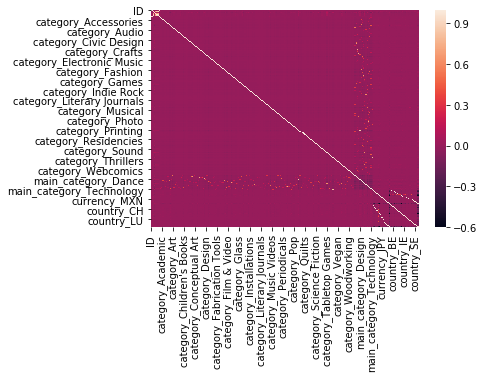

In [26]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_ctg.corr())
plt.show()

In [27]:
#予測

#不要な説明変数を省く
drop_col = ['state', 'ID','deadline','launched','name']

y = df_ctg["state"].values
X = df_ctg.drop(drop_col,axis=1).values

print(X)

clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X, y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
print("w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}".format(w0, w1, w2))

[[1.000e+03 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [3.000e+04 2.421e+03 1.500e+01 ... 0.000e+00 0.000e+00 1.000e+00]
 [4.500e+04 2.200e+02 3.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 ...
 [1.500e+04 2.000e+01 1.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [1.500e+04 2.000e+02 6.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [2.000e+03 5.240e+02 1.700e+01 ... 0.000e+00 0.000e+00 1.000e+00]]
w0 = 72.152, w1 = -493933.555, w2 = 494758.259


In [28]:
# ラベルを予測
y_est = clf.predict(X)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est)))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

対数尤度 = -0.010
正答率 = 99.971%


In [29]:
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['成功', '失敗'], 
                        columns=['成功', '失敗'])
conf_mat

,成功,失敗
成功,197711,8
失敗,89,133867
